In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('unsupervised(elian).csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,price,availability_365,room_type,review_scores_rating,neighbourhood_group_cleansed,cluster
0,48.0,365,Private room,4.60,East Region,1
1,60.0,244,Private room,4.69,North-East Region,1
2,50.0,365,Private room,4.70,East Region,1
3,200.0,362,Entire home/apt,4.93,East Region,3
4,60.0,239,Private room,4.81,North-East Region,1


In [4]:
le_room = LabelEncoder()
le_region = LabelEncoder()

In [5]:
df['room_type_encoded'] = le_room.fit_transform(df['room_type'])
df['neighbourhood_group_cleansed_encoded'] =le_region.fit_transform(df['neighbourhood_group_cleansed'])

In [6]:
room_mapping = dict(zip(le_room.classes_,le_room.transform(le_room.classes_)))
region_mapping = dict(zip(le_region.classes_,le_region.transform(le_region.classes_)))

print("room type mapping: ", room_mapping)
print("region type mapping: ", region_mapping)

room type mapping:  {'Entire home/apt': 0, 'Private room': 1}
region type mapping:  {'East Region': 0, 'North Region': 1, 'North-East Region': 2, 'West Region': 3}


In [7]:
df["estimated_revenue"] = df["price"]*df["availability_365"]

df.head()

,price,availability_365,room_type,review_scores_rating,neighbourhood_group_cleansed,cluster,room_type_encoded,neighbourhood_group_cleansed_encoded,estimated_revenue
0,48.0,365,Private room,4.60,East Region,1,1,0,17520.0
1,60.0,244,Private room,4.69,North-East Region,1,1,2,14640.0
2,50.0,365,Private room,4.70,East Region,1,1,0,18250.0
3,200.0,362,Entire home/apt,4.93,East Region,3,0,0,72400.0
4,60.0,239,Private room,4.81,North-East Region,1,1,2,14340.0


In [8]:
df["revenue_category"] = pd.qcut(df["estimated_revenue"], q=3, labels=["low","mid","high"])
print(df[df['availability_365'] != 365]['revenue_category'].value_counts())

low     58
high    50
mid     43
Name: revenue_category, dtype: int64


In [10]:
x = df[['price','availability_365','review_scores_rating','room_type_encoded','neighbourhood_group_cleansed_encoded','cluster']]
y = df["revenue_category"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [16]:
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9474
Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        13
         low       1.00      0.85      0.92        13
         mid       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [17]:
cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validation Accuracy (5-fold): 0.9368 ± 0.0614


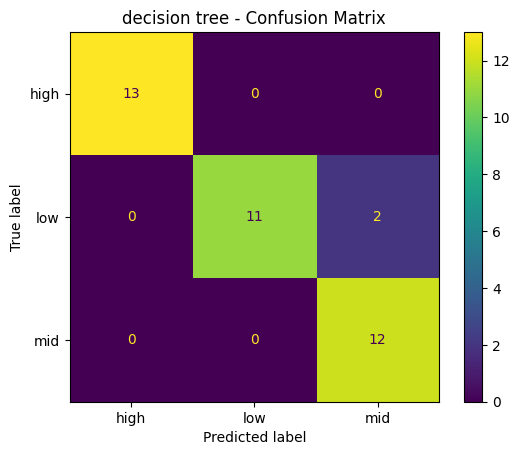

In [18]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("decision tree - Confusion Matrix")
plt.show()

In [19]:
import joblib

# Save the trained model
joblib.dump(model, 'revenue_classifier.pkl')

# Save encoders too (they're required for inference)
joblib.dump(le_room, 'le_room.pkl')
joblib.dump(le_region, 'le_region.pkl')

['le_region.pkl']